In [9]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report

textos = [

    # NOTICIAS DE DEPORTES
    'el equipo Dragon gano el partido del jueves',
    'el jugador estrella marco el gol en el minuto diez',
    'historia del futbol moderno',
    'nuevas tecnicas de fisioterapia',
    'el martes se hizo un partido amistoso entre tigres y aguilas',
    'los fanaticos celebran el campeonato en las calles',
    'el equipo Dragon gano el partido del jueves',
    'el jugador estrella marco el gol en el minuto diez',
    'historia del futbol moderno',
    'nuevas tecnicas de fisioterapia',
    'el martes se hizo un partido amistoso entre tigres y aguilas',

    # NOTICIAS DE POLITICA
    'las elecciones seran el dia diez de abril',
    'hubo revuelta en la asamblea',
    'trump va a remodelar parte de la casa blanca',
    'gana el partido conservador por mayoria de votos',
    'el gobierno de israel dicta toque de queda',
    'las elecciones seran el dia diez de abril',
    'hubo revuelta en la asamblea',
    'trump va a remodelar parte de la casa blanca',
    'gana el partido conservador por mayoria de votos',
    'el gobierno de israel dicta toque de queda',
    'el presidente presenta informe economico anual',
    'el informe de cleidys'
]

labels = ["deporte"]*11 + ["politica"]*12

X_train, X_test, y_train, y_test = train_test_split(textos, labels, test_size=0.20, random_state=42)

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

clf = MultinomialNB(alpha=1)
clf.fit(X_train_counts, y_train)

y_pred = clf.predict(X_test_counts)
print('Predicciones',y_pred)

print('Exactitud',accuracy_score(y_test, y_pred))
print('Reporte de clasificación',classification_report(y_test, y_pred))





Predicciones ['politica' 'deporte' 'deporte' 'deporte' 'politica']
Exactitud 1.0
Reporte de clasificación               precision    recall  f1-score   support

     deporte       1.00      1.00      1.00         3
    politica       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



Predicciones [1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1
 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]
--------------------------------------------------
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

--------------------------------------------------
Matriz de confusión:
 [[39  4]
 [ 1 70]]
Exactitud: 0.956140350877193
--------------------------------------------------
--------------------------------------------------


Text(70.72222222222221, 0.5, 'Valores reales')

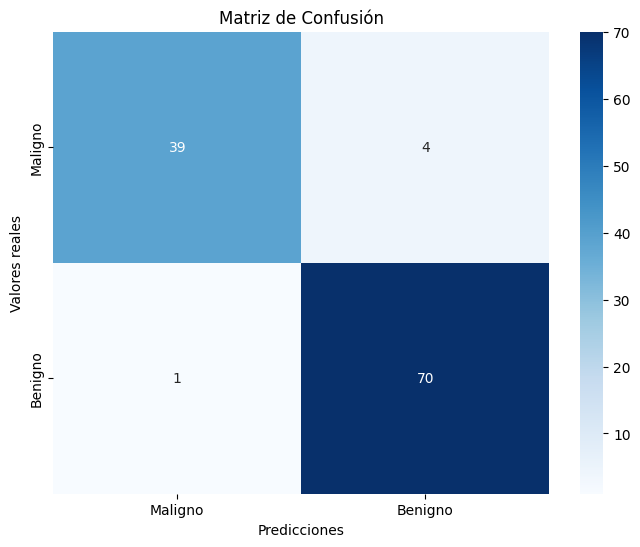

In [13]:
#KNN DE CLASIFICACION - DATASET DE CANCER DE SKLEARN

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print('Predicciones',y_pred)

#Evaluacion - Metricas
print('-'*50)
print('Reporte de clasificación:\n', classification_report(y_test, y_pred))
print('-'*50)
print('Matriz de confusión:\n', confusion_matrix(y_test, y_pred))
print('Exactitud:', accuracy_score(y_test, y_pred))
print('-'*50)
print('-'*50)

#grafica de la matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
xticklabels=['Maligno', 'Benigno'], yticklabels=['Maligno', 'Benigno'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
